# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [25]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [26]:
df_drinks=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [27]:
df_drinks.country.loc[df_drinks['beer_servings'].argmax()]

'Namibia'

### Step 5. For each continent print the statistics for wine consumption.

In [28]:
df_drinks.groupby(df_drinks.continent)['wine_servings'].sum()

continent
AF     862
AS     399
EU    6400
OC     570
SA     749
Name: wine_servings, dtype: int64

### Step 6. Print the mean alcohol consumption per continent for every column

In [29]:
df_drinks.groupby(df_drinks.continent).mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [30]:
df_drinks.groupby(df_drinks.continent).median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [31]:
pd.DataFrame(df_drinks.spirit_servings.describe()).loc[['mean','min','max']]

,spirit_servings
mean,80.994819
min,0.000000
max,438.000000


### Step E1. Aprender a utilizar gráficas de puntos de matplotlib.pyplot

In [63]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df_drinks.fillna("NA",inplace=True)

Estaba interpretando el código NA asociado al continente de América septentrional como "not a number" y había que corregirlo para que apareciesen en el gráfico.

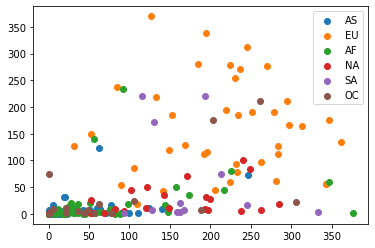

In [78]:
list_continent=df_drinks.dropna().continent.unique()
df_g=df_drinks.groupby(df_drinks.continent)
for x in list_continent:
    df_continent=df_g.get_group(x)
    plt.scatter(x=df_continent.beer_servings,y=df_continent.wine_servings,label=x)
plt.legend()